# Cyclistic Proyecto 

Eres un analista de datos júnior que trabaja en el equipo de analistas de marketing de Cyclistic, una empresa de bicicletas compartidas de Chicago. La directora de marketing cree que el éxito futuro de la empresa depende de maximizar la cantidad de membresías anuales. Por lo tanto, tu equipo quiere entender qué diferencias existen en el uso de las bicicletas Cyclistic entre los ciclistas ocasionales y los miembros anuales. A través de estos conocimientos, tu equipo diseñará una nueva estrategia de marketing para convertir a los ciclistas ocasionales en miembros anuales. Sin embargo, antes de eso, los ejecutivos de Cyclistic deben aprobar tus recomendaciones; por eso, debes respaldar tu propuesta con una visión convincente de los datos y visualizaciones profesionales de los mismos.


Hasta ahora, la estrategia de marketing de Cyclistic se basaba en la construcción de un reconocimiento de marca general y en atraer a amplios segmentos de consumidores. Uno de los enfoques que ayudó a hacer esto posible fue la flexibilidad de sus planes de precios: pases de un solo viaje, pases de un día completo y membresías anuales. A los clientes que compran pases de un solo viaje o pases de un día completo se los llama ciclistas ocasionales. Los clientes que compran membresías anuales se llaman miembros de Cyclistic.


El equipo de Marketing estableció una meta clara: Diseñar estrategias de marketing orientadas a convertir a los ciclistas ocasionales en miembros anuales. Sin embargo, para hacer eso, el equipo de analistas de marketing necesita entender mejor cómo difieren los miembros anuales y los ciclistas ocasionales, por qué los ciclistas ocasionales comprarían una membresía y cómo los medios digitales podrían afectar sus tácticas de marketing. El equipo están interesados en analizar los datos históricos de viajes en bicicleta de Cyclistic para identificar tendencias.

El Jefe de marketing te asigno la siguiente pregunta: ¿En qué se diferencian los socios anuales y los ciclistas ocasionales con respecto al uso de las bicicletas de Cyclistic?

# Lectura de Datos

Vamos a importar las librerias que utilizaremos

In [ ]:
import pandas as pd #data frames
import numpy as np  #funciones numericas
import matplotlib.pyplot as plt #graficar
import seaborn as sns
import mplfinance as mpf

Vamos a asignar una variable a cada data frame

In [4]:
df1=pd.read_csv('Trip_Q1.csv')
df2=pd.read_csv('Trip_Q2.csv')
df3=pd.read_csv('Trip_Q3.csv')
df4=pd.read_csv('Trip_Q4.csv')
df5=pd.read_csv('Trip_Q5.csv')
df6=pd.read_csv('Trip_Q6.csv')
df7=pd.read_csv('Trip_Q7.csv')
df8=pd.read_csv('Trip_Q8.csv')
df9=pd.read_csv('Trip_Q9.csv')
df10=pd.read_csv('Trip_Q10.csv')
df11=pd.read_csv('Trip_Q11.csv')
df12=pd.read_csv('Trip_Q12.csv')


# Exploracion de Datos 

Queremos ver la informacion relevante, que variables y tipo de datos contiene 

In [85]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             181806 non-null  object         
 1   rideable_type       181806 non-null  object         
 2   started_at          181806 non-null  datetime64[ns] 
 3   ended_at            181806 non-null  datetime64[ns] 
 4   start_station_name  152523 non-null  object         
 5   start_station_id    152523 non-null  object         
 6   end_station_name    150648 non-null  object         
 7   end_station_id      150648 non-null  object         
 8   start_lat           181806 non-null  float64        
 9   start_lng           181806 non-null  float64        
 10  end_lat             181678 non-null  float64        
 11  end_lng             181678 non-null  float64        
 12  member_casual       181806 non-null  object         
 13  ride_time     

Vizualizamos las primeras lineas del Data Frame 

In [65]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,weekday
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,0 days 00:09:16,Monday
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,0 days 00:26:11,Sunday
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,0 days 00:12:06,Tuesday
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member,0 days 00:29:01,Tuesday
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual,0 days 00:14:11,Wednesday


# Limpieza y Transformaación 

Queremos agreagar una columna extra que contenga la duracion de cada viaje. Lo primero es modificar el tipo de datos de object a datetime de las columnas 'started_at' y 'ended_at' 

In [6]:
df1['started_at']= pd.to_datetime(df1['started_at'])
df1['ended_at']= pd.to_datetime(df1['ended_at'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             181806 non-null  object        
 1   rideable_type       181806 non-null  object        
 2   started_at          181806 non-null  datetime64[ns]
 3   ended_at            181806 non-null  datetime64[ns]
 4   start_station_name  152523 non-null  object        
 5   start_station_id    152523 non-null  object        
 6   end_station_name    150648 non-null  object        
 7   end_station_id      150648 non-null  object        
 8   start_lat           181806 non-null  float64       
 9   start_lng           181806 non-null  float64       
 10  end_lat             181678 non-null  float64       
 11  end_lng             181678 non-null  float64       
 12  member_casual       181806 non-null  object        
dtypes: datetime64[ns](2), float64

Ahora que estan en formato de fecha agregamos otra columa para calcular la duracion de cada viaje. 


In [7]:
df1['ride_time']= df1['ended_at'] - df1['started_at']
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             181806 non-null  object         
 1   rideable_type       181806 non-null  object         
 2   started_at          181806 non-null  datetime64[ns] 
 3   ended_at            181806 non-null  datetime64[ns] 
 4   start_station_name  152523 non-null  object         
 5   start_station_id    152523 non-null  object         
 6   end_station_name    150648 non-null  object         
 7   end_station_id      150648 non-null  object         
 8   start_lat           181806 non-null  float64        
 9   start_lng           181806 non-null  float64        
 10  end_lat             181678 non-null  float64        
 11  end_lng             181678 non-null  float64        
 12  member_casual       181806 non-null  object         
 13  ride_time     

ahora añadieremos una columna que nos diga que dia de la semana se efectuo el viaje


In [8]:
df1['weekday'] = df1['started_at'].dt.day_name()
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             181806 non-null  object         
 1   rideable_type       181806 non-null  object         
 2   started_at          181806 non-null  datetime64[ns] 
 3   ended_at            181806 non-null  datetime64[ns] 
 4   start_station_name  152523 non-null  object         
 5   start_station_id    152523 non-null  object         
 6   end_station_name    150648 non-null  object         
 7   end_station_id      150648 non-null  object         
 8   start_lat           181806 non-null  float64        
 9   start_lng           181806 non-null  float64        
 10  end_lat             181678 non-null  float64        
 11  end_lng             181678 non-null  float64        
 12  member_casual       181806 non-null  object         
 13  ride_time     

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,weekday
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,0 days 00:09:16,Monday
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,0 days 00:26:11,Sunday
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,0 days 00:12:06,Tuesday
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member,0 days 00:29:01,Tuesday
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual,0 days 00:14:11,Wednesday


Repetimos el proceso para los demas df

In [9]:
#Añadimos columna ride_time y weekday a las 12 tablas
df2['started_at']= pd.to_datetime(df2['started_at'])
df2['ended_at']= pd.to_datetime(df2['ended_at'])
df2['ride_time']= df2['ended_at'] - df2['started_at']
df2['weekday'] = df2['started_at'].dt.day_name()

df3['started_at']= pd.to_datetime(df3['started_at'])
df3['ended_at']= pd.to_datetime(df3['ended_at'])
df3['ride_time']= df3['ended_at'] - df3['started_at']
df3['weekday'] = df3['started_at'].dt.day_name()

df4['started_at']= pd.to_datetime(df4['started_at'])
df4['ended_at']= pd.to_datetime(df4['ended_at'])
df4['ride_time']= df4['ended_at'] - df4['started_at']
df4['weekday'] = df4['started_at'].dt.day_name()

df5['started_at']= pd.to_datetime(df5['started_at'])
df5['ended_at']= pd.to_datetime(df5['ended_at'])
df5['ride_time']= df5['ended_at'] - df5['started_at']
df5['weekday'] = df5['started_at'].dt.day_name()

df6['started_at']= pd.to_datetime(df6['started_at'])
df6['ended_at']= pd.to_datetime(df6['ended_at'])
df6['ride_time']= df6['ended_at'] - df6['started_at']
df6['weekday'] = df6['started_at'].dt.day_name()

df7['started_at']= pd.to_datetime(df7['started_at'])
df7['ended_at']= pd.to_datetime(df7['ended_at'])
df7['ride_time']= df7['ended_at'] - df7['started_at']
df7['weekday'] = df7['started_at'].dt.day_name()

df8['started_at']= pd.to_datetime(df8['started_at'])
df8['ended_at']= pd.to_datetime(df8['ended_at'])
df8['ride_time']= df8['ended_at'] - df8['started_at']
df8['weekday'] = df8['started_at'].dt.day_name()

df9['started_at']= pd.to_datetime(df9['started_at'])
df9['ended_at']= pd.to_datetime(df9['ended_at'])
df9['ride_time']= df9['ended_at'] - df9['started_at']
df9['weekday'] = df9['started_at'].dt.day_name()

df10['started_at']= pd.to_datetime(df10['started_at'])
df10['ended_at']= pd.to_datetime(df10['ended_at'])
df10['ride_time']= df10['ended_at'] - df10['started_at']
df10['weekday'] = df10['started_at'].dt.day_name()

df11['started_at']= pd.to_datetime(df11['started_at'])
df11['ended_at']= pd.to_datetime(df11['ended_at'])
df11['ride_time']= df11['ended_at'] - df11['started_at']
df11['weekday'] = df11['started_at'].dt.day_name()

df12['started_at']= pd.to_datetime(df12['started_at'])
df12['ended_at']= pd.to_datetime(df12['ended_at'])
df12['ride_time']= df12['ended_at'] - df12['started_at']
df12['weekday'] = df12['started_at'].dt.day_name()


In [10]:
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,weekday
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.920771,-87.663712,41.907993,-87.631501,casual,0 days 00:13:56,Tuesday
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.957879,-87.649584,41.969517,-87.654691,casual,0 days 00:05:20,Wednesday
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.920771,-87.663712,41.880419,-87.655519,member,0 days 00:24:04,Sunday
3,3D561E04F739CC45,electric_bike,2023-02-26 16:12:05,2023-02-26 16:39:55,Southport Ave & Clybourn Ave,TA1309000030,Franklin St & Adams St (Temp),TA1309000008,41.920873,-87.663733,41.879434,-87.635504,member,0 days 00:27:50,Sunday
4,0CB4B4D53B2DBE05,electric_bike,2023-02-20 11:55:23,2023-02-20 12:05:48,Prairie Ave & Garfield Blvd,TA1307000160,Cottage Grove Ave & 63rd St,KA1503000054,41.794827,-87.618795,41.780531,-87.605970,member,0 days 00:10:25,Monday


Ahora uniremos los df en un solo df llamado All_Trips, que contenga los viajes realizados en 12 meses del año 2023. 

In [11]:
all_trips = pd.concat([df1, df2,df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,weekday
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,0 days 00:09:16,Monday
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,0 days 00:26:11,Sunday
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,0 days 00:12:06,Tuesday
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member,0 days 00:29:01,Tuesday
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual,0 days 00:14:11,Wednesday


Eliminaremos valores nulos y valores duplicados

In [12]:
#valores duplicados
n_duplicated = all_trips.duplicated().sum()
print(f"valores duplicados: {n_duplicated}")

all_trips[all_trips.duplicated]

valores duplicados: 0


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,weekday


In [13]:
#valores faltantes
all_trips.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    869289
start_station_id      869421
end_station_name      922436
end_station_id        922577
start_lat                  0
start_lng                  0
end_lat                 6879
end_lng                 6879
member_casual              0
ride_time                  0
weekday                    0
dtype: int64

Tenemos valores nulos en las columnas start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng. Vamos a crear otro df que remueva esos valores nulos. 

In [14]:
c_all_trips = all_trips.dropna()
c_all_trips.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_time             0
weekday               0
dtype: int64

# Analisis de Datos 

Ahora tenemos todos los datos reuinidos y propiamente limpios y validados podemos comenzar el analisis. Se dividira en 5 consultas. Calcularemos:
1. Promedio de duracion de viajes de la variable ride_time, 
2. Moda de la variable weekday, 
3. Porcentaje de usuarios habituales. 
4. Promedio de la duracion de viajes para usuarios casuales y habituales. 
5. Cantidad de viajes por dia de la semana realizadas por usuarios casuales y habituales. 

## 1. Promedio de la duración de viajes


In [22]:
c_all_trips.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_time
count,4299967,4299967,4.299967e+06,4.299967e+06,4.299967e+06,4.299967e+06,4299967
mean,2023-07-03 03:47:14.904931072,2023-07-03 04:03:12.263578880,4.190095e+01,-8.764464e+01,4.190137e+01,-8.764486e+01,0 days 00:15:57.358648101
min,2022-12-01 00:01:22,2022-12-01 00:03:41,4.164850e+01,-8.784409e+01,0.000000e+00,-8.784406e+01,-1 days +23:05:26
25%,2023-05-10 07:21:06.500000,2023-05-10 07:31:49,4.188084e+01,-8.765762e+01,4.188096e+01,-8.765842e+01,0 days 00:05:37
50%,2023-07-12 16:52:18,2023-07-12 17:04:54,4.189636e+01,-8.764170e+01,4.189662e+01,-8.764182e+01,0 days 00:09:48
75%,2023-09-07 07:39:31.500000,2023-09-07 07:51:02.500000,4.192731e+01,-8.762858e+01,4.192877e+01,-8.762858e+01,0 days 00:17:29
max,2023-11-30 23:58:38,2023-12-01 09:47:35,4.206485e+01,-8.752823e+01,4.206485e+01,0.000000e+00,8 days 10:16:18
std,NaN,NaN,4.303152e-02,2.489457e-02,5.559158e-02,7.737307e-02,0 days 00:35:58.577397501


Podemos ver que el total de viajes en el año es: 4,299,967 
el promedio de duracion es: 16 min
el 25% de los viajes se encuentra en el rango de 0 a 6 minutos 
el 50% de los viajes se encuentra en el rango de 0 a 10 minutos 
el 75% de los viajes se encuentra en el rango de 0 a 18 minutos 

Agrupamamos en una tabla para la parte de visualizacion

Graficamos 

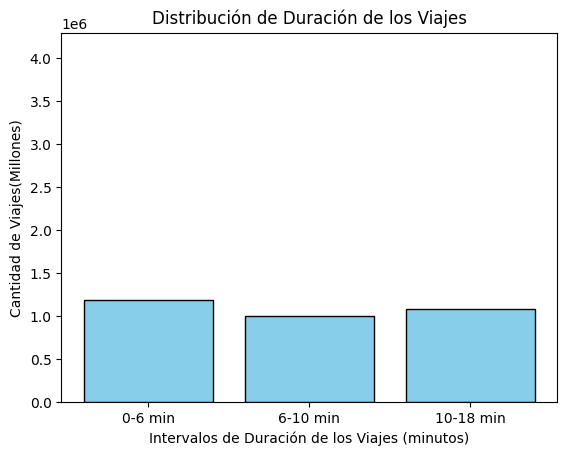

In [86]:


# Suponiendo que ride_times contiene la duración de los viajes (tipo timedelta)
# Convertir la duración de los viajes a minutos
ride_times_minutes = c_all_trips['ride_time'] / pd.Timedelta(minutes=1)

# Definir los intervalos hasta 18 minutos
intervalos = [0, 6, 10, 18]

# Contar la cantidad de viajes en cada intervalo
frecuencias, bordes = np.histogram(ride_times_minutes, bins=intervalos)

# Crear el gráfico de barras
plt.bar(range(len(intervalos) - 1), frecuencias, align='center', color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Intervalos de Duración de los Viajes (minutos)')
plt.ylabel('Cantidad de Viajes(Millones)')
plt.title('Distribución de Duración de los Viajes')

# Añadir etiquetas de los intervalos
plt.xticks(range(len(intervalos) - 1), ['0-6 min', '6-10 min', '10-18 min'])

# Ajustar el rango del eje Y para incluir la cantidad total de viajes
plt.ylim(0, c_all_trips.shape[0])

# Mostrar el gráfico
plt.show()


## 2. Moda de la variable weekday

In [47]:

weekday_mode = c_all_trips['weekday'].mode()[0]

print("La moda es:", weekday_mode)



La moda es: Saturday


Queremos saber cantidad de viajes por día

In [46]:
#
day_trips = c_all_trips['weekday'].value_counts()

print("Cantidad de viajes por día de la semana:")
print(day_trips)

Cantidad de viajes por día de la semana:
weekday
Saturday     654440
Thursday     651076
Tuesday      629964
Wednesday    628730
Friday       619561
Monday       559734
Sunday       556462
Name: count, dtype: int64


Validamos el total de vaiejes 

In [50]:
day_trips.sum()

4299967

Graficamos 

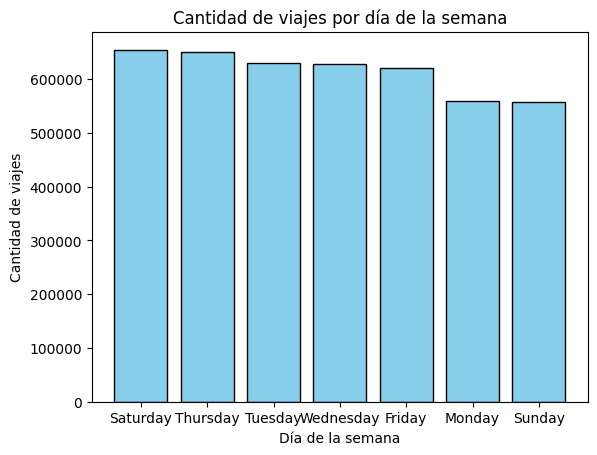

In [45]:
import matplotlib.pyplot as plt

# Suponiendo que 'weekday' es el nombre de la columna que contiene el día de la semana
day_trips = c_all_trips['weekday'].value_counts()

# Crear el gráfico de barras
plt.bar(day_trips.index, day_trips.values, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.title('Cantidad de viajes por día de la semana')

# Mostrar el gráfico
plt.show()

## 3. Porcentaje de viajes realizados por miembros y por usuarios casuales. 

Contamos valores 

In [71]:
members = c_all_trips['member_casual'].value_counts()

# Convertir la Serie a un DataFrame
members_df = pd.DataFrame(members)

members_df = members_df.rename(columns={'member_casual': 'Tipo de miembro', 'count': 'Total de viajes'})

# Imprimir el DataFrame con los nuevos nombres de columnas
members_df

,Total de viajes
member_casual,
member,2773391
casual,1526576


Validamos con el total de viajes 

In [72]:
total_trips = members.sum()
total_trips 


4299967

Calculamos el porcentaje de miembros casuales y habituales con respecto al total de viajes 

In [74]:
member_percent = members['member'] / total_trips *100
casual_percent = members['casual'] / total_trips *100

print(member_percent)
print(casual_percent)

64.49796010062403
35.50203989937597


Graficamos 

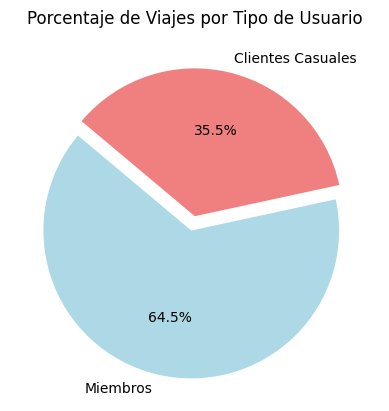

In [49]:
labels = ['Miembros', 'Clientes Casuales']
sizes = [member_percent, casual_percent]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explotar la primera porción (miembros)

# Crear el gráfico circular
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Añadir un título
plt.title('Porcentaje de Viajes por Tipo de Usuario')

# Mostrar el gráfico
plt.show()

## 4.Promedio de la duracion de viajes para usuarios casuales y habituales. 

In [52]:


# Calcular el promedio de la duración de los viajes para miembros
avg_members = c_all_trips[c_all_trips['member_casual'] == 'member']['ride_time'].mean()

# Calcular el promedio de la duración de los viajes para ciclistas ocasionales
avg_casual = c_all_trips[c_all_trips['member_casual'] == 'casual']['ride_time'].mean()

print("Promedio de duración de viajes para miembros:", avg_members)
print("Promedio de duración de viajes para ciclistas ocasionales:", avg_casual)


Promedio de duración de viajes para miembros: 0 days 00:12:07.265058551
Promedio de duración de viajes para ciclistas ocasionales: 0 days 00:22:55.378773149


## 5. Cantidad de viajes por dia de la semana realizadas por usuarios casuales y habituales. 

Agrupar los datos por día de la semana y calcular el promedio de ride_time para cada grupo

In [54]:
avg_ride_time_day = c_all_trips.groupby('weekday')['ride_time'].mean()

print("Promedio de ride_time por día de la semana:")
print(avg_ride_time_day)

Promedio de ride_time por día de la semana:
weekday
Friday      0 days 00:15:48.417335823
Monday      0 days 00:14:57.789296344
Saturday    0 days 00:19:24.464902817
Sunday      0 days 00:19:30.229595192
Thursday    0 days 00:14:08.265698628
Tuesday     0 days 00:14:11.144616200
Wednesday   0 days 00:13:54.616433127
Name: ride_time, dtype: timedelta64[ns]


Agrupar los datos por día de la semana y calcular el recuento de trip_id para cada grupo

In [78]:
viajes_por_dia = c_all_trips.groupby('weekday')['ride_id'].count()

print("Número de viajes por día de la semana:")
print(viajes_por_dia)


Número de viajes por día de la semana:
weekday
Friday       619561
Monday       559734
Saturday     654440
Sunday       556462
Thursday     651076
Tuesday      629964
Wednesday    628730
Name: ride_id, dtype: int64


Filtrar los datos para usuarios ocasionales ('casual')

In [82]:
# Filtrar los datos para usuarios ocasionales ('casual')
viajes_ocasionales = c_all_trips[c_all_trips['member_casual'] == 'casual']

# Agrupar por día de la semana y contar los ride_id únicos para cada grupo
viajes_por_dia_ocasionales = viajes_ocasionales.groupby(['weekday', 'member_casual'])['ride_id'].count()

print("Número de viajes por día de la semana para usuarios ocasionales agrupados por ride_id:")
print(viajes_por_dia_ocasionales)





Número de viajes por día de la semana para usuarios ocasionales agrupados por ride_id:
weekday    member_casual
Friday     casual           226195
Monday     casual           175301
Saturday   casual           308670
Sunday     casual           253201
Thursday   casual           199333
Tuesday    casual           181877
Wednesday  casual           181999
Name: ride_id, dtype: int64


Podemos observar que la mayor cantidad de viajes por miembros casuales se realiza Sabado y domingo 

Ahora filtramos los datos para miembros habituales ('member')

In [84]:

viajes_miembros  = c_all_trips[c_all_trips['member_casual'] == 'member']

# Agrupar por día de la semana y contar los ride_id únicos para cada grupo
viajes_por_dia_miembros = viajes_miembros.groupby(['weekday', 'member_casual'])['ride_id'].count()

print("Número de viajes por día de la semana para usuarios habituales")
print(viajes_por_dia_miembros)

Número de viajes por día de la semana para usuarios habituales
weekday    member_casual
Friday     member           393366
Monday     member           384433
Saturday   member           345770
Sunday     member           303261
Thursday   member           451743
Tuesday    member           448087
Wednesday  member           446731
Name: ride_id, dtype: int64


Podemos observar que la mayor cantidad de viajes por miembros se realiza los dias martes, miercoles y jueves. 

# Conclusiones

1. Total viajes 2023 = 4,299,967
2. Promedio duracion de viaje 2023 = 16 minutos
3. Dia con mayor cantidad de viajes sabado con 654,440
4. Dia con menor cantida de viajes domingo con 556,462
5. 64.5% de los viajes realizados por Miembros 
6. 35.5% de los viajes relizados por Casuales 
7. Promedio de duración de viajes para miembros: 12 minutos
8. Promedio de duración de viajes para Casuales 23 minutos 
9. Dia de a semana con mas viajes por Casuales Sabado con 308,670 y  domingo con 253,201
10. Dia de la semana con mas viajes por Miembros Jueves con 451,743 Martes con 448,087  y Miercoles con  446,731


Sugerencias de acciones basadas en datos. 

1. Los datos muestran que los usuarios Casuales utilizan los servicios de bicicleta el sabdo y domingo, pero no entre semana, mientras que los Miembros utilizan mitad de semana. Lo que puede indicar que los casuales lo utilizan en dias de descanso y los miembros en días laborales. Lo que puede indicar que los miembros utilizan los servicios de bicicleta para trasladarse a su trabajo o a la escuela, habrá que realziar encuestas para indicar con que grado de probailidad se cumple. De ser así, una estrategiad de marketing para aumentar los miembros es incentivar a los casuales a utilizar la bicicleta entre semana para trasladarse en bicicleta al trabajo o escuela. 

2. Incentivar el uso de la bicileta entre semana tambien añadiendo descuentos para usuarios ocacionales entre semana.


